# Homework 1 

## Data Cleaning, Describing, and Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Stuff to read in the json
import json
import requests

#Silencing deprication warnings
import warnings
warnings.filterwarnings("ignore")

# Graduate School Admission Chance 
## .csv 

I am reading in data that predicts the chance of admission to graduate school from important parameters. The data can be found here: https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict_Ver1.1.csv

## Clean the Data

I am going to dive deeper and see if there is anything in the data that is missing or needs cleaning. I am guessing I won't find anything to clean because the .csv file looked pristine, but we will run some tests to make sure.

In [3]:
adm_pred = pd.read_csv("file:///Users/Codis_Joben/Documents/Pythondocs/Admission_Predict_Ver1.1.csv", 
                       header=0, names=None)

In [4]:
adm_pred.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
adm_pred.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
adm_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


## Describe the Data

A useful analysis of this data will be to view the correlation between the different variables to see which variable, if any, have the greatest weight when it comes to graduate admissions.

In [7]:
adm_pred.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


The far right column gives us the insight we want to see. It looks like GPA has the strongest correlation with a high chance of admission, followed closely by GRE and TOEFL scores.

I don't think the above analysis provides accurate insight on the importance of research to the chance of graduate admissions. I will run analysis to get an idea of the average admission chance between those with research and those without, ignoring all other variables, and see if that shows anything useful.

In [8]:
adm_pred.groupby(['Research'])['Chance of Admit '].mean()

Research
0    0.634909
1    0.789964
Name: Chance of Admit , dtype: float64

Now we can see that those who did research averaged about 79% chance of admit whereas those without research averaged about 63% chance of admit. Let's see if research is tied to the other variables like GRE and CGPA.

In [9]:
print(adm_pred.groupby(['Research'])['GRE Score'].mean())
print(adm_pred.groupby(['Research'])['CGPA'].mean())

Research
0    309.300000
1    322.107143
Name: GRE Score, dtype: float64
Research
0    8.234727
1    8.844929
Name: CGPA, dtype: float64


Based off of this data, I would conclude that the students who have done research tend to also have higher grades and test scores than those who don't do research.

It looks like focusing on CGPA, GRE/TOEFL, and coming from a higher rated school are the best factors for increasing your chances of being admitted to graduate school.

## Visualize the Data

I will show some of the key findings in this data in a way that is easy to understand and insightful for students who are preparing to get into graduate school.

In [10]:
sns.set(style='ticks', palette='Set2')

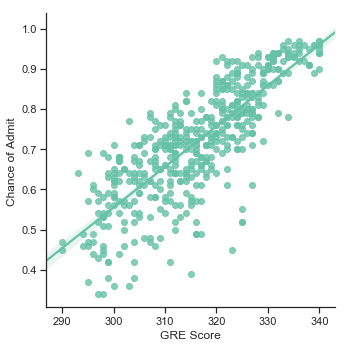

In [11]:
print(sns.lmplot(x="GRE Score", y="Chance of Admit ", data=adm_pred))

Now we can see that there are a few data points that are further from our predicted values based on the regression line, but those points are found lower on the GRE Score. From this data, we can safely conclude that high GRE scores result in high chances of admission.

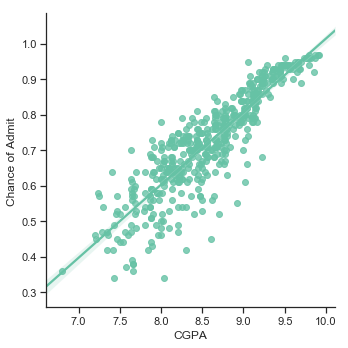

In [12]:
print(sns.lmplot(x="CGPA", y="Chance of Admit ", data=adm_pred))

The data supporting that CGPA is a huge factor in chance of admission is even stronger. This suggests that overall grades are the most important aspect for getting admitted to graduate school.

I am curious to see the distribution of the CGPA of the students they observed for this data set. It would be nice to see that they collected data from an even distribution of students.

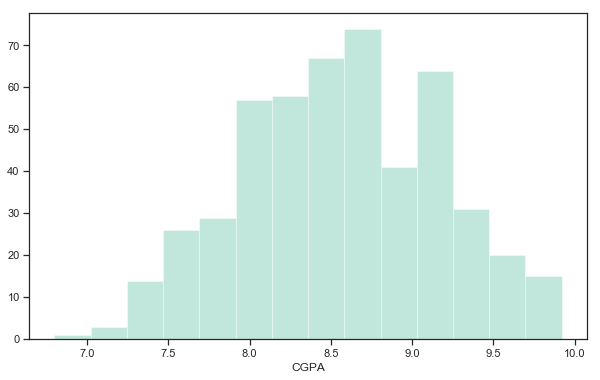

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(adm_pred.CGPA, kde=False)

This is a good observation. It shows that they were careful in selecting their candidates to observe as far as their GPA is concerned, because the distribution is what you would expect to see from a large and unbias sample of potential graduate school applicants. 

Let's get an idea of the kind of schools they were collecting this data from.

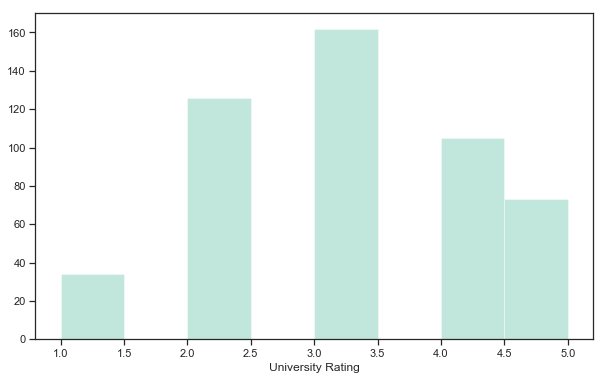

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(adm_pred['University Rating'], kde=False)

The data comes from an even distrubtion of university ratings, which is also good. It isn't perfect, but good enough to provide good insight for prospective applicants.


Now prospective grad school applicants should have a good idea of what they need to focus on to increase their chance of admission. A high CGPA and GRE Score will definitely be a game changer. Coming from a high rated university is also a plus. Research isn't as strong of a deciding factor, so don't let it interfere with your grades and GRE prep.

# Pokemon GO 
## .json

I found some data on github that shows a lot of info on the pokemon from Pokemon Go. 

## Clean the Data

In [15]:
getdata = requests.get("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")

In [16]:
data_dict = json.loads(getdata.text)

In [17]:
data_dict.keys()

dict_keys(['pokemon'])

In [18]:
#turning the json into a dataframe
pokemon = pd.DataFrame(data_dict['pokemon'])
pokemon.head(10)

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,69.00,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,NaN,0.6900,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg
1,4.20,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.0420,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg
2,1.70,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,NaN,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.0170,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg
3,25.30,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,NaN,0.2530,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg
4,1.20,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.0120,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg
5,0.31,Charmander Candy,NaN,Not in Eggs,1.70 m,6,http://www.serebii.net/pokemongo/pokemon/006.png,None,Charizard,NaN,006,"[{'num': '004', 'name': 'Charmander'}, {'num':...",0.0031,13:34,"[Fire, Flying]","[Water, Electric, Rock]",90.5 kg
6,58.00,Squirtle Candy,25.0,2 km,0.51 m,7,http://www.serebii.net/pokemongo/pokemon/007.png,[2.1],Squirtle,"[{'num': '008', 'name': 'Wartortle'}, {'num': ...",007,NaN,0.5800,04:25,[Water],"[Electric, Grass]",9.0 kg
7,3.40,Squirtle Candy,100.0,Not in Eggs,0.99 m,8,http://www.serebii.net/pokemongo/pokemon/008.png,[1.4],Wartortle,"[{'num': '009', 'name': 'Blastoise'}]",008,"[{'num': '007', 'name': 'Squirtle'}]",0.0340,07:02,[Water],"[Electric, Grass]",22.5 kg
8,0.67,Squirtle Candy,NaN,Not in Eggs,1.60 m,9,http://www.serebii.net/pokemongo/pokemon/009.png,None,Blastoise,NaN,009,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",0.0067,00:06,[Water],"[Electric, Grass]",85.5 kg
9,303.20,Caterpie Candy,12.0,2 km,0.30 m,10,http://www.serebii.net/pokemongo/pokemon/010.png,[1.05],Caterpie,"[{'num': '011', 'name': 'Metapod'}, {'num': '0...",010,NaN,3.0320,16:35,[Bug],"[Fire, Flying, Rock]",2.9 kg


In [19]:
#I want to get rid of kg in weight and make it a float so I can run stats on it
pokemon['weight'] = pokemon['weight'].map(lambda x: x.lstrip().rstrip(' kg'))
pokemon['weight'] = pokemon['weight'].convert_objects(convert_numeric=True)
pokemon.head()

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,69.0,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,NaN,0.690,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9
1,4.2,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.042,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0
2,1.7,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,NaN,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.017,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0
3,25.3,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,NaN,0.253,08:45,[Fire],"[Water, Ground, Rock]",8.5
4,1.2,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.012,19:00,[Fire],"[Water, Ground, Rock]",19.0


In [20]:
pokemon.describe()

,avg_spawns,candy_count,id,spawn_chance,weight
count,151.000000,70.000000,151.000000,151.000000,151.000000
mean,53.992603,57.300000,76.000000,0.731985,45.951656
std,111.156064,48.897512,43.734045,1.956376,59.447988
min,0.000000,12.000000,1.000000,0.000000,0.100000
25%,1.450000,31.250000,38.500000,0.015500,9.900000
50%,7.200000,50.000000,76.000000,0.074000,30.000000
75%,55.000000,50.000000,113.500000,0.620000,56.250000
max,712.000000,400.000000,151.000000,15.980000,460.000000


In [21]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
avg_spawns        151 non-null float64
candy             151 non-null object
candy_count       70 non-null float64
egg               151 non-null object
height            151 non-null object
id                151 non-null int64
img               151 non-null object
multipliers       70 non-null object
name              151 non-null object
next_evolution    70 non-null object
num               151 non-null object
prev_evolution    72 non-null object
spawn_chance      151 non-null float64
spawn_time        151 non-null object
type              151 non-null object
weaknesses        151 non-null object
weight            151 non-null float64
dtypes: float64(4), int64(1), object(12)
memory usage: 20.1+ KB


## Describe the Data

I am going to take a look at some different aspects of this dataset and see if we can determine which Pokemon are the easiest/hardest to find, which types are most common, and more.

In [22]:
#Looking at Pokemon type to see which ones are most common and most rare
pokemon['type'].value_counts()

[Water]               18
[Normal]              16
[Fire]                10
[Poison]              10
[Grass, Poison]        9
[Normal, Flying]       8
[Electric]             8
[Psychic]              8
[Fighting]             7
[Ground]               6
[Bug, Poison]          5
[Rock, Ground]         4
[Rock, Water]          4
[Bug]                  3
[Water, Psychic]       3
[Ghost, Poison]        3
[Water, Ice]           3
[Bug, Grass]           2
[Water, Poison]        2
[Bug, Flying]          2
[Grass, Psychic]       2
[Poison, Ground]       2
[Fire, Flying]         2
[Ground, Rock]         2
[Poison, Flying]       2
[Dragon]               2
[Electric, Flying]     1
[Ice, Flying]          1
[Dragon, Flying]       1
[Grass]                1
[Rock, Flying]         1
[Water, Fighting]      1
[Ice, Psychic]         1
[Water, Flying]        1
Name: type, dtype: int64

This is interesting to see. I am a fan of the game but never looked into any of these things. Water is the most common while the hybrids tend to be less common.

In [23]:
#Curious to see which types are the heaviest
pokemon['type'] = pokemon['type'].astype(str)
pokemon.groupby(['type'])['weight'].mean().sort_values(ascending=False)

type
['Water', 'Flying']       235.000000
['Dragon', 'Flying']      210.000000
['Rock', 'Ground']        158.750000
['Water', 'Ice']          157.500000
['Ground', 'Rock']        117.500000
['Fire', 'Flying']         75.250000
['Water', 'Psychic']       64.833333
['Grass', 'Psychic']       61.250000
['Poison', 'Ground']       61.000000
['Rock', 'Flying']         59.000000
['Normal']                 56.168750
['Ice', 'Flying']          55.400000
['Fighting']               54.285714
['Water', 'Fighting']      54.000000
['Electric', 'Flying']     52.600000
['Psychic']                51.562500
['Water', 'Poison']        50.250000
['Bug', 'Flying']          44.000000
['Fire']                   42.580000
['Ice', 'Psychic']         40.600000
['Grass']                  35.000000
['Water']                  31.477778
['Normal', 'Flying']       31.337500
['Poison', 'Flying']       31.250000
['Electric']               29.187500
['Rock', 'Water']          23.625000
['Bug']                    22.600

Well, there you go. Water and Dragon Flying types are the heaviest. The one Dragon is the lightest, which is weird because you would think that the ghost hybrids would be the lightest.

In [24]:
#let's look at the 10 most common pokemon
pokeview = pokemon[['name', 'spawn_chance']].copy()
pokeview.nlargest(10, 'spawn_chance')

,name,spawn_chance
15,Pidgey,15.980
18,Rattata,13.050
12,Weedle,7.120
40,Zubat,6.520
128,Magikarp,4.780
20,Spearow,4.730
95,Drowzee,3.210
9,Caterpie,3.032
132,Eevee,2.750
53,Psyduck,2.540


In [25]:
#now let's see the most rare
pokeview.nsmallest(10, 'spawn_chance')

,name,spawn_chance
131,Ditto,0.0000
143,Articuno,0.0000
144,Zapdos,0.0000
145,Moltres,0.0000
149,Mewtwo,0.0000
150,Mew,0.0000
148,Dragonite,0.0011
5,Charizard,0.0031
88,Muk,0.0031
121,Mr. Mime,0.0031


In [26]:
#let's drop the 6 pokemon that don't spawn in the wild and then take a look at the 10 most rare
pokeview.drop(pokeview.index[[131, 143, 144, 145, 149, 150]]).nsmallest(10, 'spawn_chance')

,name,spawn_chance
148,Dragonite,0.0011
5,Charizard,0.0031
88,Muk,0.0031
121,Mr. Mime,0.0031
129,Gyarados,0.0032
140,Kabutops,0.0032
75,Golem,0.0047
70,Victreebel,0.0059
130,Lapras,0.0060
138,Omastar,0.0061


## Visualize the Data

I am going to take a closer look at some of the data and see if I can't find a good visualization to better understand it.

Let's see the distribution of unique pokemon among the different types.

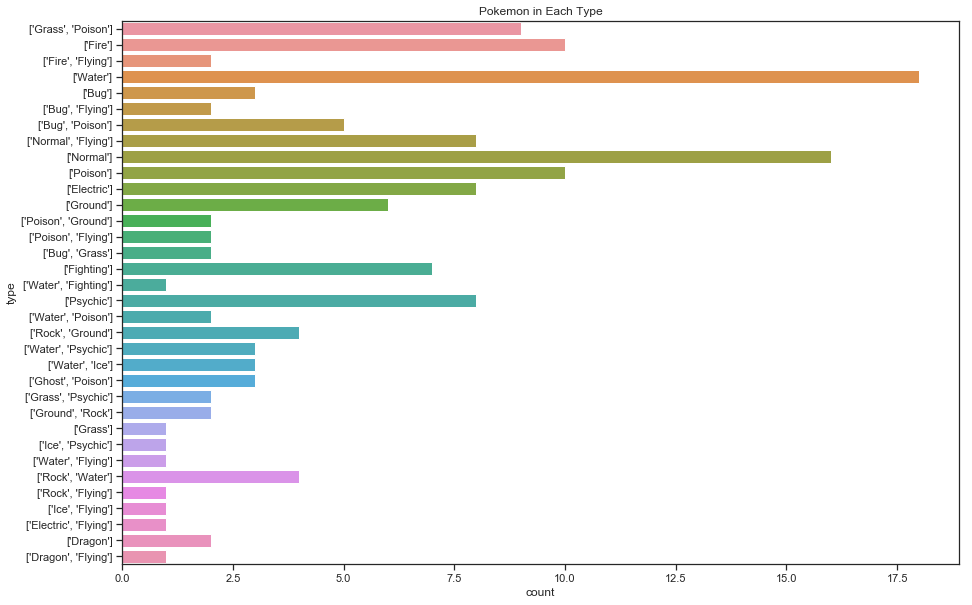

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.countplot(y="type", data=pokemon)
plot.set_title('Pokemon in Each Type')
plt.show()

Before people get set on catching them all and setting the lifelong goal of evolving all their pokemon, they should know how many pokemon fall into the different amounts of candy required for each evolution.

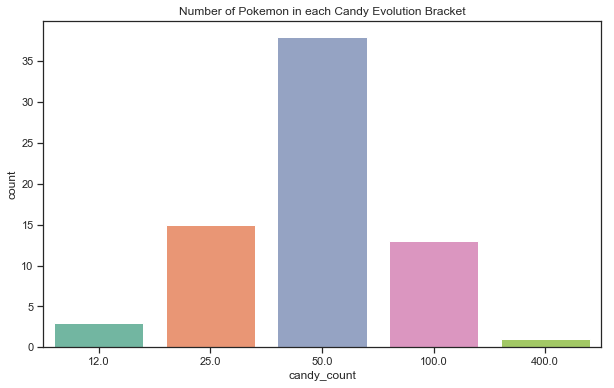

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
plot = sns.countplot(x='candy_count', data=pokemon)
plot.set_title('Number of Pokemon in each Candy Evolution Bracket')
plt.show()

Lastly, I'd like to see which pokemon types would be most likely to be seen on average.

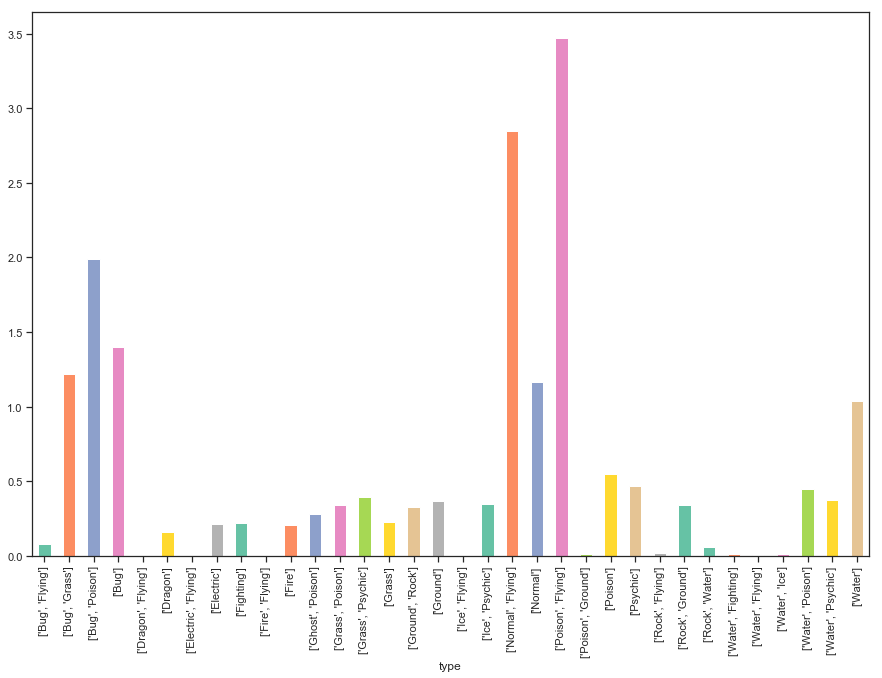

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
pokemon.groupby(['type'])['spawn_chance'].mean().plot.bar()

Now you will have a good idea of what you will run into and how long it will take you to catch 'em all as you embark on your PokemonGO journey. To be honest, if you haven't started your journey by this point then you might as well not even try because this data is only for the first gen, they are several gens into the game now. 

# Crime in Sacramento
## .xls

I am now going to take a look at some data on crime in Sacramento from 2006. This data was originally found here: https://support.spatialkey.com/spatialkey-sample-csv-data/

## Cleaning the Data

In [30]:
sa_crime = pd.read_excel("file:///Users/Codis_Joben/Documents/Pythondocs/SacramentocrimeJanuary2006.xls", 
                       header=0, names=None)
sa_crime.head()

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,2006-01-01,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,2006-01-01,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,2006-01-01,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,2006-01-01,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,2006-01-01,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613


In [31]:
#Let's see what we have in the data
print(sa_crime.describe())

          district         grid  ucr_ncic_code     latitude    longitude
count  7584.000000  7584.000000    7584.000000  7584.000000  7584.000000
mean      3.574631   916.250791    4275.068829    38.559809  -121.463832
std       1.642512   407.436310    2171.593193     0.056101     0.034621
min       1.000000   102.000000     909.000000    38.437999  -121.555832
25%       2.000000   567.000000    2309.000000    38.518476  -121.489543
50%       3.000000   899.000000    3532.000000    38.559523  -121.465459
75%       5.000000  1264.000000    7000.000000    38.610361  -121.435947
max       6.000000  1661.000000    8102.000000    38.683789  -121.365238


In [32]:
#I want to see what kind of data we are working with
sa_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 9 columns):
cdatetime        7584 non-null datetime64[ns]
address          7584 non-null object
district         7584 non-null int64
beat             7584 non-null object
grid             7584 non-null int64
crimedescr       7584 non-null object
ucr_ncic_code    7584 non-null int64
latitude         7584 non-null float64
longitude        7584 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 533.3+ KB


In [33]:
#I want to drop the time on cdatetime to simplify my visualtion
sa_crime['cdatetime'] = sa_crime['cdatetime'].apply( lambda x: x.date() )

In [34]:
#Let's check the data and see if there are any null values in the columns
sa_crime.isna().sum().sort_values(ascending=False)

longitude        0
latitude         0
ucr_ncic_code    0
crimedescr       0
grid             0
beat             0
district         0
address          0
cdatetime        0
dtype: int64

There aren't any null values, this data looks pretty clean as is.

## Describe the Data

This data shows us the crime reported in January 2006 in Sacramento. The data shows which day the crime happened, the area, and what crime was committed. I am going to take a closer to look to see what kind of diversity in location and types of crime this data shows to figure out how best to visualize the data in a useful way.

In [35]:
#I want to count the different unique values in some of the columns
sa_crime.nunique()

cdatetime          31
address          5492
district            6
beat               20
grid              539
crimedescr        304
ucr_ncic_code      88
latitude         5296
longitude        5280
dtype: int64

In [36]:
#I'll make a graph of this, but let's see how much crime has been comitted on each day of the month, 
#and the average amount of crime per month
print("Average amount of crimes per day: ", sa_crime['crimedescr'].count() // sa_crime['cdatetime'].nunique())
print('\n', sa_crime.groupby('cdatetime')['crimedescr'].count())

Average amount of crimes per day:  244

 cdatetime
2006-01-01    250
2006-01-02    145
2006-01-03    256
2006-01-04    257
2006-01-05    268
2006-01-06    233
2006-01-07    242
2006-01-08    182
2006-01-09    261
2006-01-10    244
2006-01-11    311
2006-01-12    265
2006-01-13    272
2006-01-14    207
2006-01-15    214
2006-01-16    199
2006-01-17    282
2006-01-18    295
2006-01-19    266
2006-01-20    274
2006-01-21    213
2006-01-22    204
2006-01-23    241
2006-01-24    277
2006-01-25    249
2006-01-26    254
2006-01-27    279
2006-01-28    251
2006-01-29    182
2006-01-30    266
2006-01-31    245
Name: crimedescr, dtype: int64


I will continue to describe the data as I move into the visualization portion of this data set.

## Visualize the Data

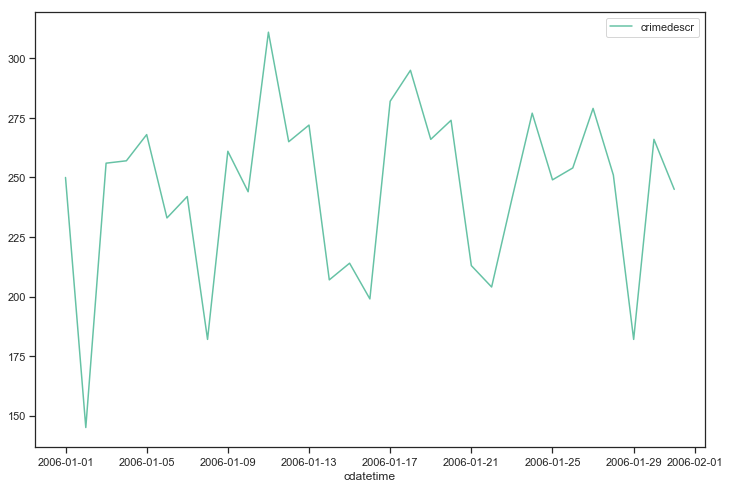

In [37]:
#Let's take a look at the pattern of crime throughout the month
fig, ax = plt.subplots(figsize=(12, 8))
sa_crime.groupby('cdatetime')['crimedescr'].count().plot(legend=True)

It is interesting how it is a very consistent wave. It makes me wonder if the crimes are reported real time or if they are reported whenever the law enforcement gets a chance to do the paperwork. There doesn't seem to be any data suggesting that certain times of the month have significantly more crimes than other times. 

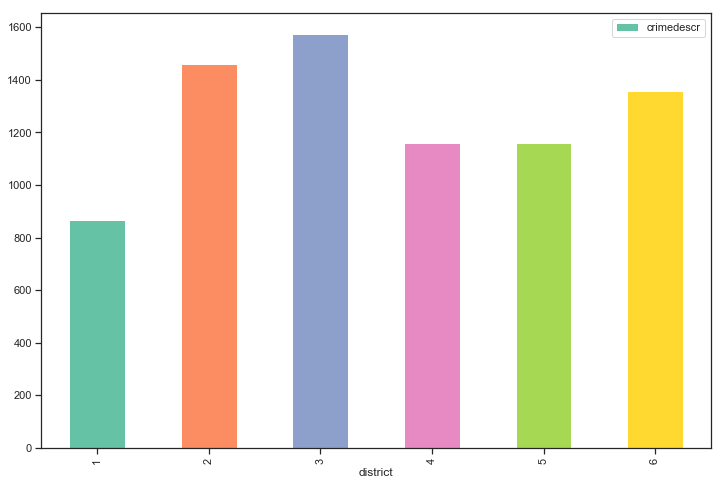

In [38]:
#I am going to visualize the amount of crime in each district
fig, ax = plt.subplots(figsize=(12, 8))
plot = sa_crime.groupby('district')['crimedescr'].count().plot.bar(legend=True)

District 3 has the most crime, followed closely by 2. 

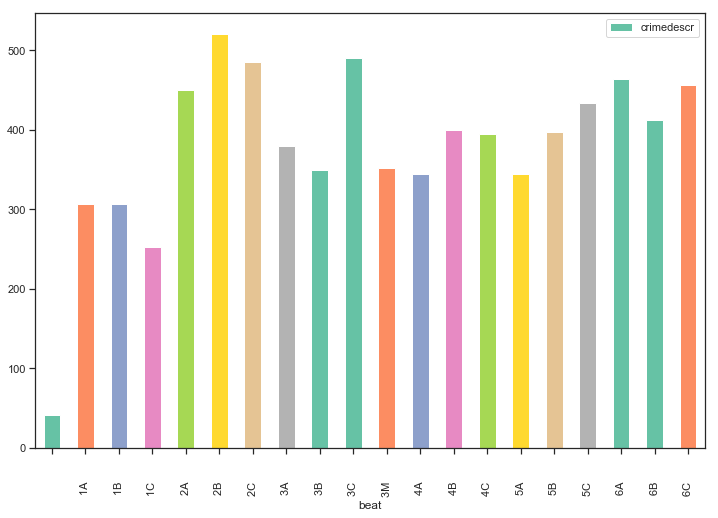

In [39]:
#Now I want to see it by beat
fig, ax = plt.subplots(figsize=(12, 8))
plot = sa_crime.groupby('beat')['crimedescr'].count().plot.bar(legend=True)

2B, 2C, and 3C have the most crimes. Interestingly enough, each of the beats of district 2 have more than any other district, but district 3 has the most crime overall but that is due to the additonal beat within that district. 

Looking at this information would have given propsective home buyers in Sacramento a good idea of where they should and shouldn't look. Honestly, it looks like anywhere in Sacramento has a lot of crime, but some areas are worse than others. 